In [1]:
#porting Important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,accuracy_score,auc,hinge_loss,roc_auc_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Conv2D,MaxPooling2D, Flatten

In [2]:
df= pd.read_csv('Diabetes.csv')

In [3]:
title_mapping = {'YES':1,'NO':0}
df[' Class variable']=df[' Class variable'].map(title_mapping)

In [4]:
col=['n_pregnant','glucose_conc','bp','skin_len','insulin','bmi','pedigree_fun','age','Output']
df.columns=col

In [5]:
diabetes_true_count = len(df.loc[df['Output'] == True])
diabetes_false_count = len(df.loc[df['Output'] == False])

In [6]:
col=['glucose_conc','bp','insulin','bmi','skin_len']
for i in col:
    df[i].replace(0, np.nan, inplace= True)

In [7]:
def median_target(var):
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Output']].groupby(['Output'])[[var]].median().reset_index()
    return temp

In [8]:
median_target('insulin')
median_target('glucose_conc')
median_target('skin_len')
median_target('bp')
median_target('bmi')

,Output,bmi
0,0,30.1
1,1,34.3


In [9]:
#Filling the NaN value with Median according to Output
df.loc[(df['Output'] == 0 ) & (df['insulin'].isnull()), 'insulin'] = 102.5
df.loc[(df['Output'] == 1 ) & (df['insulin'].isnull()), 'insulin'] = 169.5
df.loc[(df['Output'] == 0 ) & (df['glucose_conc'].isnull()), 'glucose_conc'] = 107
df.loc[(df['Output'] == 1 ) & (df['glucose_conc'].isnull()), 'glucose_conc'] = 140
df.loc[(df['Output'] == 0 ) & (df['skin_len'].isnull()), 'skin_len'] = 27
df.loc[(df['Output'] == 1 ) & (df['skin_len'].isnull()), 'skin_len'] = 32
df.loc[(df['Output'] == 0 ) & (df['bp'].isnull()), 'bp'] = 70
df.loc[(df['Output'] == 1 ) & (df['bp'].isnull()), 'bp'] = 74.5
df.loc[(df['Output'] == 0 ) & (df['bmi'].isnull()), 'bmi'] = 30.1
df.loc[(df['Output'] == 1 ) & (df['bmi'].isnull()), 'bmi'] = 34.3

In [10]:
median_target('n_pregnant')
df.loc[(df['Output'] == 0 ) & (df['n_pregnant']>13), 'n_pregnant'] = 2
df.loc[(df['Output'] == 1 ) & (df['n_pregnant']>13), 'n_pregnant'] = 4

In [11]:
median_target('bp')
df.loc[(df['Output'] == 0 ) & (df['bp']<40), 'bp'] = 70
df.loc[(df['Output'] == 1 ) & (df['bp']<40), 'bp'] = 74.5
df.loc[(df['Output'] == 0 ) & (df['bp']>103), 'bp'] = 70
df.loc[(df['Output'] == 1 ) & (df['bp']>103), 'bp'] = 74.5

In [12]:
median_target('skin_len')
df.loc[(df['Output'] == 0 ) & (df['skin_len']>38), 'skin_len'] = 27
df.loc[(df['Output'] == 1 ) & (df['skin_len']>38), 'skin_len'] = 32
df.loc[(df['Output'] == 0 ) & (df['skin_len']<20), 'skin_len'] = 27
df.loc[(df['Output'] == 1 ) & (df['skin_len']<20), 'skin_len'] = 32

In [13]:
median_target('bmi')
df.loc[(df['Output'] == 0 ) & (df['bmi']>48), 'bmi'] = 30.1
df.loc[(df['Output'] == 1 ) & (df['bmi']>48), 'bmi'] = 34.3

In [14]:
median_target('pedigree_fun')
df.loc[(df['Output'] == 0 ) & (df['pedigree_fun']>1), 'pedigree_fun'] = 0.336
df.loc[(df['Output'] == 1 ) & (df['pedigree_fun']>1), 'pedigree_fun'] = 0.449

In [15]:
median_target('age')
df.loc[(df['Output'] == 0 ) & (df['age']>61), 'age'] = 27
df.loc[(df['Output'] == 1 ) & (df['age']>61), 'age'] = 36

In [16]:
df.dtypes

n_pregnant        int64
glucose_conc    float64
bp              float64
skin_len        float64
insulin         float64
bmi             float64
pedigree_fun    float64
age               int64
Output            int64
dtype: object

In [17]:
df.head()

,n_pregnant,glucose_conc,bp,skin_len,insulin,bmi,pedigree_fun,age,Output
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,0.449,33,1


In [18]:
df['Output'].unique()

array([1, 0], dtype=int64)

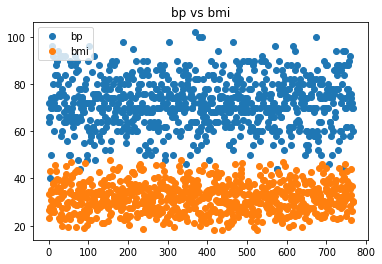

In [19]:
#data visulation
plt.plot(df['bp'],'o')
plt.plot(df['bmi'],'o')
plt.title('bp vs bmi')
plt.legend(['bp','bmi'], loc='upper left')
plt.show()

In [20]:
scaler = MinMaxScaler()
df.col=['n_pregnant','glucose_conc','bp','skin_len','insulin','bmi','pedigree_fun','age','Output']
df[df.col]= scaler.fit_transform(df[df.col])

C:\Users\dell\AppData\Local\Temp/ipykernel_15208/1028016794.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.col=['n_pregnant','glucose_conc','bp','skin_len','insulin','bmi','pedigree_fun','age','Output']


In [21]:
df

,n_pregnant,glucose_conc,bp,skin_len,insulin,bmi,pedigree_fun,age,Output
0,0.461538,0.670968,0.516129,0.833333,0.186899,0.518519,0.597388,0.725,1.0
1,0.076923,0.264516,0.419355,0.500000,0.106370,0.282828,0.297062,0.250,0.0
2,0.615385,0.896774,0.387097,0.666667,0.186899,0.171717,0.646355,0.275,1.0
3,0.076923,0.290323,0.419355,0.166667,0.096154,0.333333,0.096844,0.000,0.0
4,0.000000,0.600000,0.000000,0.833333,0.185096,0.838384,0.403700,0.300,1.0
...,...,...,...,...,...,...,...,...,...
763,0.769231,0.367742,0.580645,0.388889,0.199519,0.494949,0.101197,0.150,0.0
764,0.153846,0.503226,0.483871,0.388889,0.106370,0.626263,0.285092,0.150,0.0
765,0.384615,0.496774,0.516129,0.166667,0.117788,0.269360,0.181719,0.225,0.0
766,0.076923,0.529032,0.322581,0.666667,0.186899,0.400673,0.294886,0.650,1.0


In [22]:
#Splitting the Data
X = df.drop(['Output'], 1)
y = df['Output']

C:\Users\dell\AppData\Local\Temp/ipykernel_15208/3676967039.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df.drop(['Output'], 1)


In [23]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.20,random_state=0)

In [24]:
X_train.shape

(614, 8)

In [25]:
X_test.shape

(154, 8)

In [26]:
y_train.shape

(614,)

In [27]:
y_test.shape

(154,)

In [29]:
model = SVC(kernel='linear')
history=model.fit(X_train,y_train)

In [30]:
y_pred=model.predict(X_test)

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.89      0.92       107
         1.0       0.78      0.89      0.83        47

    accuracy                           0.89       154
   macro avg       0.86      0.89      0.87       154
weighted avg       0.90      0.89      0.89       154



Text(69.0, 0.5, 'Truth')

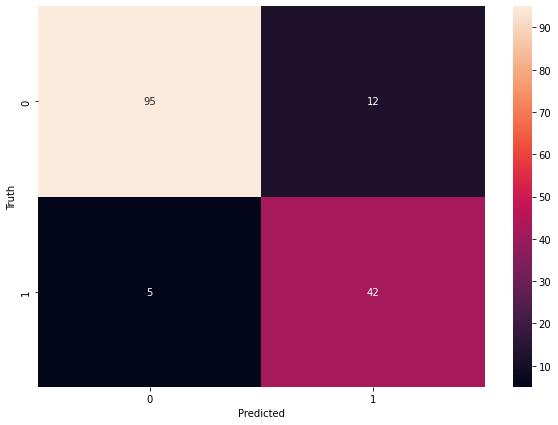

In [32]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

ROC AUC: 0.89


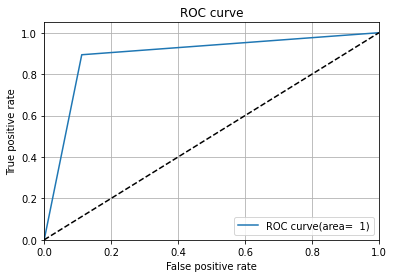

In [33]:
fpr,tpr,_=roc_curve(y_test,y_pred)
#calculate AUC
roc_auc=auc(fpr,tpr)
print('ROC AUC: %0.2f' % roc_auc)
#plot of ROC curve for a specified class
plt.figure()
plt.plot(fpr,tpr,label='ROC curve(area= %2.f)' %roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [34]:
param_grid={'C':[0.1, 1, 10, 100],
            'gamma':[1,0.1,0.01,0.001],
            'kernel':['rbf']
           }

from sklearn.model_selection import GridSearchCV
optimal_params = GridSearchCV(
        SVC(),
        param_grid,
        cv=5,
        scoring='accuracy',
        verbose=0
)

optimal_params.fit(X_train, y_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}


In [35]:
model=SVC(kernel='rbf', C=100, gamma=1) # C is 100 which means we will use regularization and the ideal value for gamma is 1
model.fit(X_train,y_train)

SVC(C=100, gamma=1)

In [36]:
print(f'accuracy - : {optimal_params.score(X_train,y_train):.3f}')

accuracy - : 0.950
